In [27]:
import timm
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
from timm.data import resolve_model_data_config, create_transform
import random
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DATASET_PATH = "D:/Datasets/landmark-recognition-2021"
SEED = 42


,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


##### Training IDs table

In [ ]:
train_df = pd.read_csv(f"{DATASET_PATH}/train.csv")
train_df.head()

##### Seeding

In [35]:
def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.benchmark = False


seed_everything(SEED)

##### Training dataset metadata

In [37]:
labels = dict(zip(train_df["id"], train_df["landmark_id"]))

train_ids, test_ids = train_test_split(
    train_df["id"].tolist(),
    test_size=0.2,
    random_state=SEED,
    stratify=train_df["landmark_id"],
)

partition = {"train": train_ids, "test": test_ids}
print(f"Training IDs:{len(partition['train'])}\nTest IDs:{len(partition['test'])}")
print(f"Total IDs/labels: {len(labels)}")

Training IDs:1264376
Test IDs:316094
Total IDs/labels: 1580470


In [31]:
model = timm.create_model("efficientnetv2_m")
config = resolve_model_data_config(model)
transform = create_transform(**config)
model.default_cfg

{'url': '',
 'architecture': 'efficientnetv2_m',
 'tag': 'untrained',
 'custom_load': False,
 'input_size': (3, 320, 320),
 'test_input_size': (3, 416, 416),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 1.0,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (10, 10),
 'first_conv': 'conv_stem',
 'classifier': 'classifier'}

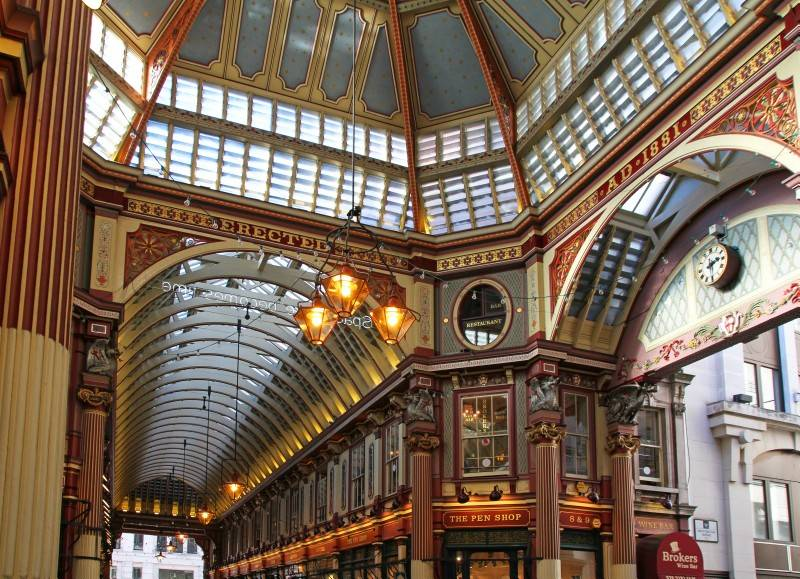

In [32]:
image_path = f"{DATASET_PATH}/train/0/0/0/000a5cf3f3346229.jpg"
im = Image.open(image_path).convert("RGB")
im

In [33]:
tensor = transform(im)
tensor

tensor([[[ 0.2111,  0.1254,  0.1083,  ...,  0.5022,  0.3994,  0.5536],
         [ 0.2624,  0.1768,  0.1597,  ...,  0.6906,  0.2796, -0.0972],
         [ 0.2111,  0.2796,  0.2624,  ...,  0.2967,  0.2796, -0.3541],
         ...,
         [ 0.5193, -0.3883,  0.0569,  ..., -0.4397, -0.3541, -0.2856],
         [ 0.7077,  0.1768,  0.6906,  ..., -0.6109, -0.3541, -0.2856],
         [ 1.1529,  0.1426,  0.1768,  ...,  0.0912,  0.3138,  0.6221]],

        [[ 0.3277,  0.2577,  0.2577,  ...,  0.3803,  0.2227,  0.7479],
         [ 0.3277,  0.3102,  0.2927,  ...,  0.5378,  0.1001, -0.0049],
         [ 0.2227,  0.3803,  0.3627,  ...,  0.1352,  0.0651, -0.4076],
         ...,
         [ 0.8529, -0.1625,  0.2227,  ..., -1.4580, -1.4230, -1.4930],
         [ 0.7654,  0.2577,  0.7304,  ..., -1.3880, -1.1429, -1.1779],
         [ 1.0455,  0.1176,  0.1001,  ..., -0.5301, -0.2850, -0.0574]],

        [[ 0.6182,  0.4788,  0.3916,  ...,  0.0082, -0.0092,  0.5834],
         [ 0.6531,  0.5136,  0.4265,  ...,  0